# Analysis on Data Jobs

Questions
* What data job pays the highest?
* Where are the job opportunities (Industry, location, company)?
* What are the degree requirement for different job title?
* What are employers' most desired skills?

## 1. Read Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_ds = pd.read_csv('DataScientist.csv',na_values = [-1,'Unknown','Unknown / Non-Applicable'])
df_da = pd.read_csv('DataAnalyst.csv',na_values = [-1,'Unknown','Unknown / Non-Applicable'])
df_de = pd.read_csv('DataEngineer.csv',na_values = [-1,'Unknown','Unknown / Non-Applicable'])
df_ba = pd.read_csv('BusinessAnalyst.csv',na_values = [-1,'Unknown','Unknown / Non-Applicable'])


df_ba.drop(['Unnamed: 0','index'],axis=1, inplace=True)
df_ds.drop(['Unnamed: 0','index'],axis=1, inplace=True)
df_da.drop(['Unnamed: 0'],axis=1, inplace=True)

df_ba = df_ba.head(3692)

df_ds['Job Category'] = 'Data Scientist'
df_da['Job Category'] = 'Data Analyst'
df_de['Job Category'] = 'Data Engineer'
df_ba['Job Category'] = 'Business Analyst'

df = pd.concat([df_ds, df_da, df_de, df_ba])
df = df.drop_duplicates(subset=['Job Description'])
df.reset_index(drop=True, inplace=True)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Job Category
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007.0,Company - Private,Travel Agencies,Travel & Tourism,NaN,NaN,NaN,Data Scientist
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008.0,Company - Private,"Health, Beauty, & Fitness",Consumer Services,NaN,NaN,NaN,Data Scientist
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,NaN,Decode_M,"New York, NY","New York, NY",1 to 50 employees,NaN,NaN,NaN,NaN,NaN,NaN,True,Data Scientist
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019.0,Company - Private,Internet,Information Technology,NaN,"Zocdoc, Healthgrades",NaN,Data Scientist
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007.0,Company - Private,Advertising & Marketing,Business Services,NaN,"BBDO, Grey Group, Droga5",NaN,Data Scientist


In [3]:
df.shape

(10168, 16)

In [4]:
# Prportion of nulls in each field
df.isnull().mean().sort_values(ascending=False)

Easy Apply           0.958891
Competitors          0.722954
Revenue              0.327596
Founded              0.258458
Industry             0.139949
Sector               0.139654
Rating               0.098249
Size                 0.077400
Type of ownership    0.065795
Headquarters         0.058320
Salary Estimate      0.000098
Company Name         0.000098
Job Title            0.000000
Job Description      0.000000
Location             0.000000
Job Category         0.000000
dtype: float64

## 2. Clean Data
Clean the following fields
* Job Category - Adjust job category per job title
* Salary Estimate - Convert Per Hour salary to Anual Salary; Convert salary range to mean salary
* Location - Break down to State and City; Keep US states only

In [5]:
df.loc[df['Job Title'].str.lower().str.contains('data scientist'),'Job Category'] = 'Data Scientist'
df.loc[df['Job Title'].str.lower().str.contains('business analyst'),'Job Category'] = 'Business Analyst'
df.loc[df['Job Title'].str.lower().str.contains('data analyst'),'Job Category'] = 'Data Analyst'
df.loc[df['Job Title'].str.lower().str.contains('data engineer'),'Job Category'] = 'Data Engineer'

df['Job Category'].value_counts()

Business Analyst    3197
Data Engineer       2413
Data Analyst        2309
Data Scientist      2249
Name: Job Category, dtype: int64

In [6]:
# Parse salary range to lower bound and upper bound
df_salary = df["Salary Estimate"].str.extract(r'([\d]+)([K$-]*)([\d]+)')

# Calculate mean salary
df['Average Salary'] = (df_salary[0].astype(float) + df_salary[2].astype(float)) / 2

# Convert Per Hour rate to annual salary
is_per_hour = ~df_salary[1].str.contains('K').astype(bool)
df['Average Salary'].loc[is_per_hour] *= 40*52/1000 # 40 hrs per week, 52 weeks a year

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [7]:
df['Average Salary'].value_counts().sort_index(ascending = False)

225.00    27
217.50    12
205.00    30
204.00    29
193.50    26
          ..
37.50     22
37.44      3
36.50     29
36.00      8
33.50     10
Name: Average Salary, Length: 210, dtype: int64

In [8]:
# Location break down to State and City
df['Location'] = df['Location'].str.replace('Greenwood Village, Arapahoe','Arapahoe')
df['Location'] = df['Location'].str.replace('Santa Fe Springs, Los Angeles','Los Angeles')

df_location = df['Location'].str.split(',',expand=True)
df_location.columns = ['City','State']
df_location['State'] = df_location['State'].str.strip()
df = pd.concat([df,df_location],axis=1)

# Keep US states only
states = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
df = df[df['State'].isin(states)]

In [9]:
df['State'].value_counts()

TX    3060
CA    2841
NY    1012
IL     845
PA     710
AZ     693
NJ     217
FL     184
OH     181
CO      96
NC      90
DE      67
WA      54
VA      48
UT      33
IN      23
GA       4
SC       3
KS       3
Name: State, dtype: int64

In [10]:
df = df[['Job Category','Average Salary','State','Sector','Job Description']]
df.head()

,Job Category,Average Salary,State,Sector,Job Description
0,Data Scientist,146.0,NY,Travel & Tourism,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ..."
1,Data Scientist,146.0,NY,Consumer Services,"At Noom, we use scientifically proven methods ..."
2,Data Scientist,146.0,NY,NaN,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...
3,Data Analyst,146.0,NJ,Information Technology,Sapphire Digital seeks a dynamic and driven mi...
4,Data Scientist,146.0,NY,Business Services,"Director, Data Science - (200537)\nDescription..."


## 3. Analysis

### 3.1 What data job pays the highest?

In [11]:
salary_medians = df.groupby("Job Category")["Average Salary"].median()
salary_order = salary_medians.index

In [12]:
job_counts = df["Job Category"].value_counts()
job_counts = job_counts[salary_order]
job_counts = [str(x) for x in job_counts]
job_counts = ["n=" + i for i in job_counts]
job_counts

['n=3197', 'n=2308', 'n=2413', 'n=2246']

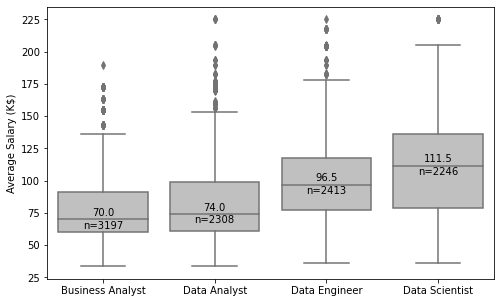

In [18]:
fig, axs = plt.subplots(figsize = [8, 5])
box_plot = sns.boxplot(data=df, x='Job Category', y='Average Salary', color='silver', order = salary_order)
plt.ylabel('Average Salary (K$)')
plt.xlabel('')

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, salary_medians[xtick]+3, salary_medians[xtick], 
            horizontalalignment='center',size='medium',color='black')
for xtick in box_plot.get_xticks():
    box_plot.text(xtick, salary_medians[xtick]-7, job_counts[xtick], 
            horizontalalignment='center',size='medium',color='black')

From the boxplot above, we can see that, Business Analyst and Data Analyst have similar salary with the former slightly lower. Data Engineer has higher salary with median = 96.5K. Data Scientist has the highest salary with median = 111.5K. Business Analyst has the lowest salary with median = 70K but has more job opennings (n=3197).

### 3.2 Where are the job opportunities?

In [31]:
def job_plot(group, color1, color2, size=[15,5]):
    # group is the column to group data frame, string
    # size is the figure size, a list of length by width
    # color1 is the color for barplots (number of job listings)
    # color2 is the color for pointplots (average salary)
    plt.figure(figsize = size)

    # Plot number of job listings
    counts = df[group].value_counts()
    ax = sns.barplot(x = counts.index.values, y = counts, color=color1)
    plt.xticks(rotation = 90);
    plt.ylabel('Number of job listings')
    # number lable
    for i in range (counts.shape[0]):
        count = counts[i]
        plt.text(i, count+100, count, ha = 'center', va='top', color=color1)
    
    # Plot average salary
    salary_mean = df['Average Salary'].mean()
    salary_by_group = df.groupby(group)['Average Salary'].mean()

    ax2 = ax.twinx()
    sns.pointplot(data=df, 
                  x = group, 
                  y = 'Average Salary', 
                  linestyles="", 
                  dodge = True,
                  order = counts.index,
                  capsize = .2,
                  ax = ax2,
                  color = color2
                  )
    plt.ylabel('Avg. Salary (K$)')

    # salary lable
    for i in range (counts.shape[0]):
        g = counts.index[i]
        salary = salary_by_group[g]
        salary_formatted = int(np.round(salary))
        plt.text(i+0.3, salary, 
                 salary_formatted,
                 ha = 'center', va='center',
                 color = color2)

    # Plot average salary line
    ax2.axhline(salary_mean, color = color2, ls='dashed')

#### 3.2.1 Which industry has more data jobs/pays higher?

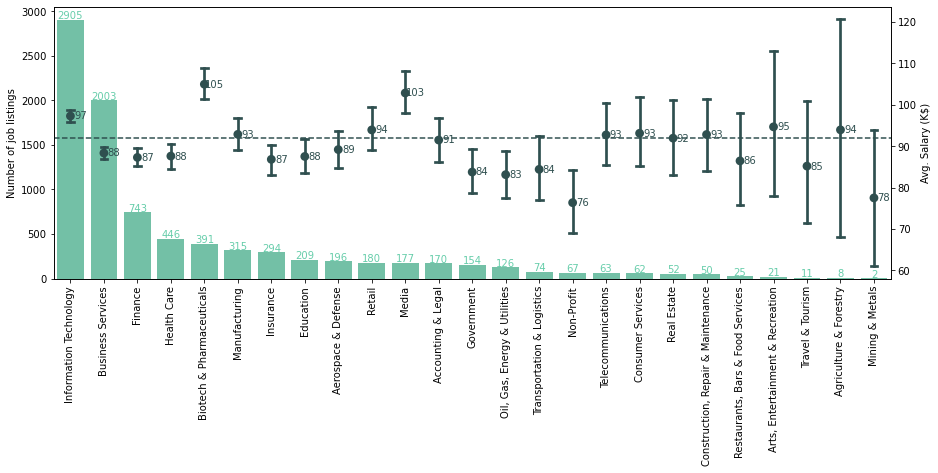

In [34]:
job_plot(group = 'Sector', color1 = 'mediumaquamarine', color2 = 'darkslategray')

From the plot above, we can see that the job opportunities are mostly in IT and Business Services. IT salary level (97K) is higher than the average and Business Services has a lower salary level (88K) than the average. 
Bitech & Pharmaceuticals and Media have much higher salary levels, 105K and 103K respectively, than other industries; but they do not have many job listings as IT and Business Services do.

#### 3.2.2 Which State has more data jobs/pays higher?

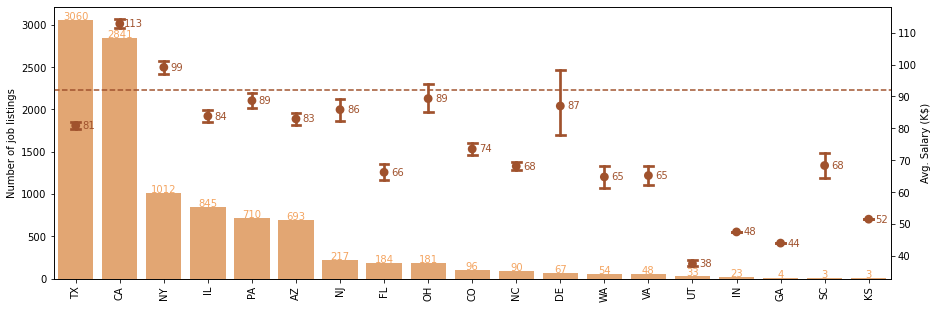

In [21]:
job_plot(group = 'State', color1 = 'sandybrown', color2 = 'sienna')

The chart above shows that the majority of data jobs are located in TX and CA. 
CA seems to be the best state to look for a data job as it has the highest salary level and numerous job opportunities. TX has the most job listings but its salary level is much lower than CA and also below average. However, the difference in salary level is probably due to different cost of living in each state. 

### 3.3 What are the degree requriements?

In [22]:
# Extract degrees from job description
bachelor = ['bachelor','bsc','b.eng','b.sc']
master = ['master','msc','m.sc','m.eng','advanced degree']
doctor = ['doctor','phd','doctorate','ph.d']

df['Job Description'] = df['Job Description'].str.replace('\n',' ')
df['Degree']="Unspecified"
for i in df.index:
    if any(word in df['Job Description'][i].lower() for word in bachelor):
        df.loc[i,'Degree'] = 'Bachelor'
    elif any(word in df['Job Description'][i].lower() for word in master):
        df.loc[i, 'Degree'] = 'Master'
    elif any(word in df['Job Description'][i].lower() for word in doctor):
        df.loc[i, 'Degree'] = 'PhD'

In [23]:
df['Degree'].value_counts()

Bachelor       4520
Unspecified    4029
Master         1081
PhD             534
Name: Degree, dtype: int64

In [24]:
# Data processing
job_degree_counts = df.groupby(['Job Category','Degree']).size().reset_index().rename(columns={0:'Counts'})

job_counts = pd.DataFrame(df['Job Category'].value_counts())
job_counts.columns = ['Total']

job_degree_counts['Total']=None
for i in job_counts.index:
    job_degree_counts.loc[job_degree_counts['Job Category']==i,'Total'] = job_counts['Total'][i]

job_degree_counts['Percentage'] = job_degree_counts['Counts']/job_degree_counts['Total']

<Figure size 864x504 with 0 Axes>

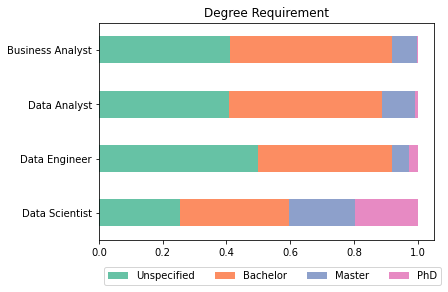

In [25]:
# Visualization
job_degree_pivot = pd.pivot_table(job_degree_counts, values = 'Percentage', index='Job Category', columns = 'Degree')

ordered_degree = ['Unspecified','Bachelor','Master','PhD']
job_degree_pivot = job_degree_pivot[ordered_degree]

sns.set_palette('Set2')
plt.figure(figsize = [12, 7])
job_degree_pivot.plot(
    kind = 'barh',
    stacked = True,
    title = 'Degree Requirement',
    mark_right = True);
plt.gca().invert_yaxis()
plt.ylabel("")
plt.legend(bbox_to_anchor=(0, -0.1), loc='upper left', ncol=4);

In [26]:
# Print data
output = job_degree_pivot.to_string(formatters={'Unspecified': '{:,.0%}'.format,
                                                'Bachelor': '{:,.0%}'.format,
                                                'Master': '{:,.0%}'.format,
                                                'PhD': '{:,.0%}'.format})
print(output)

Degree           Unspecified Bachelor Master PhD
Job Category                                    
Business Analyst         41%      51%     8%  0%
Data Analyst             41%      48%    10%  1%
Data Engineer            50%      42%     5%  3%
Data Scientist           25%      34%    20% 20%


When we look at the requirement on degrees, Business Analyst, Data Analyst, and Data Engineer are similar - only half of the job listings mentioned the degree required; when they do require a degree, more than 80% require a Bachelor degree, and very few require an advanced degree.
Data Scientist is noticeably different than the other 3 job categories. 75% of job listings on Data Scientist would specify the degree required. Requirement of advanced degrees are more common in Data Scientist job listings. 

### 3.4 Which languages are mentioned the most in job listings?

In [27]:
def get_keyword_freq(df, job_category, keywords_lst):
    # Returns a dictionary of keywords frequency
    if job_category == 'All':
        job_descriptions = df['Job Description']
    else:
        job_descriptions = df.loc[df['Job Category']==job_category,'Job Description']
        
    keywords_freq = dict()
    for word in keywords_lst:
        counter = 0
        for jd in job_descriptions:
            if word in jd:
                counter += 1
        keywords_freq[word] = counter
    keywords_df = pd.DataFrame(list(keywords_freq.items()))
    keywords_df.columns = ['Keywords','Count']
    keywords_df['Freq'] = keywords_df['Count']/len(job_descriptions)
    return keywords_df.sort_values('Count',ascending=False).reset_index(drop=True)

In [28]:
# Get language frequency by job category, store in a dictionary
languages = ["Python", "R ", "SQL", "Java ", "JavaScript", "Scala", "C++", "C#"]

category_lst = ['All', 'Data Scientist','Data Engineer','Data Analyst','Business Analyst']

lang = dict()
for job_category in category_lst:
    lang[job_category] = get_keyword_freq(df,job_category,languages)

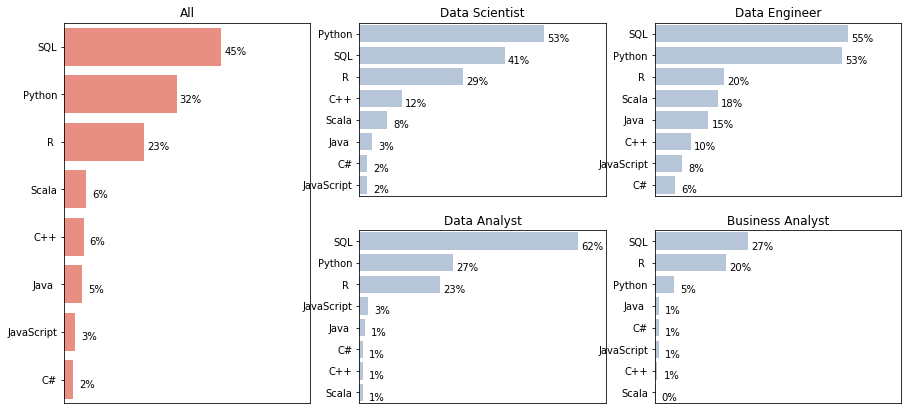

In [29]:
# Plots
# Prepare subplot locations
plt.figure(figsize = [15, 7])
ax_dict = dict()
ax_dict['All'] = plt.subplot2grid((2,3), (0, 0), rowspan=2)
ax_dict['Data Scientist'] = plt.subplot2grid((2,3), (0, 1))
ax_dict['Data Engineer'] = plt.subplot2grid((2,3), (0, 2))
ax_dict['Data Analyst'] = plt.subplot2grid((2,3), (1, 1))
ax_dict['Business Analyst'] = plt.subplot2grid((2,3), (1, 2))


# Plots
for job_category in category_lst:
    
    if job_category == 'All':
        base_color = 'salmon'
    else:
        base_color = 'lightsteelblue'
        
    subplot_df = lang[job_category]
    subplot_ax = ax_dict[job_category]
    sns.barplot(y = subplot_df['Keywords'], 
                x = subplot_df['Freq'], 
                ax = subplot_ax,
                color = base_color)
    
    for l in languages:
        i = subplot_df.index[subplot_df['Keywords'] == l].values[0]
        freq = subplot_df['Freq'][i]
        freq_format = str(int(np.round(freq*100)))+'%'
        subplot_ax.text(freq+0.04, i, freq_format, ha = 'center', va='top')
    
    subplot_ax.set_title(job_category)
    subplot_ax.set_xlim(0,0.7)
    subplot_ax.set_xticks([])
    subplot_ax.set_xlabel('')
    subplot_ax.set_ylabel('')

SQL, Python, R are the top 3 programming languages mentioned in job descriptions for all 4 data jobs.

For Data Scientist and Data Engineer, Python and SQL are the most popular, 40% ~ 55% of job postings have mentioned at least one of these two languages. R is an alternative to Python, but it is not as popular with only 20% ~ 30% of Data Scientist/Data Engineer jobs mentioning R.

For Data Analyst, 62% of job postings demanded the use of SQL, while only 20% ~ 30% mentioned Python or R.

In job postings of Business Analyst, programming languages do not seem to be as important as in other 3 job categories - less than 30% have mentioned SQL and 20% have mentioned R. Python, popular as in other job categories, has only been mentioned in 5% of the Business Analyst job postings.
